In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

## Initial examination of data

In [2]:
data = pd.read_csv('Dry_Bean_Dataset.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
data["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

## Preprocessing for initial model testing

In [5]:
# Stratified split into train and test set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Class"]):
 strat_train_set = data.loc[train_index]
 strat_test_set = data.loc[test_index]
beans = strat_train_set.copy()

In [6]:
# Encoding labels
le = LabelEncoder()
beans["Class"] = le.fit_transform(beans["Class"])
beans["Class"]

1453    5
6470    4
4639    2
4655    2
1936    5
       ..
2172    0
5291    2
2477    0
6431    4
3600    1
Name: Class, Length: 10888, dtype: int64

In [7]:
corr_matrix = beans.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class              1.000000
ShapeFactor1       0.389957
roundness          0.385472
ShapeFactor2       0.334449
Solidity           0.323563
ShapeFactor3       0.168400
ShapeFactor4       0.163410
Compactness        0.156856
Extent            -0.031167
AspectRation      -0.116804
Eccentricity      -0.201311
MajorAxisLength   -0.454153
MinorAxisLength   -0.456568
Area              -0.474206
ConvexArea        -0.476492
EquivDiameter     -0.479618
Perimeter         -0.506347
Name: Class, dtype: float64

In [8]:
labels = beans[['Class']]
features_unscaled = beans.drop('Class', axis=1)

In [9]:
# Scaling features
min_max = MinMaxScaler(feature_range=(-1, 1))
features_scaled = min_max.fit_transform(features_unscaled)
features = pd.DataFrame(features_scaled, index=features_unscaled.index, columns=features_unscaled.columns)
features.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000
mean,-0.714057,-0.518252,-0.497223,-0.527911,-0.205519,0.536356,-0.713073,-0.542572,0.248863,0.799912,0.531526,-0.081118,-0.012898,-0.257871,-0.173429,0.820094
std,0.256911,0.312252,0.315436,0.266335,0.351117,0.265397,0.258114,0.294868,0.315524,0.124420,0.237653,0.355854,0.293833,0.384990,0.350587,0.168462
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.860494,-0.739201,-0.743314,-0.684897,-0.419196,0.436334,-0.860899,-0.731719,0.048571,0.761069,0.366640,-0.296019,-0.185188,-0.620526,-0.393183,0.768229
50%,-0.787328,-0.605714,-0.581668,-0.585875,-0.251516,0.575200,-0.787112,-0.614976,0.312563,0.830157,0.570610,-0.072839,0.007899,-0.274078,-0.178771,0.870772
75%,-0.640879,-0.340435,-0.290889,-0.441732,-0.030709,0.707626,-0.638115,-0.410379,0.487362,0.876272,0.705156,0.115371,0.172142,0.035489,0.010292,0.928503
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Testing models

In [10]:
labels_arr = labels.to_numpy().ravel()
features_arr = features.to_numpy()

forest_clf = RandomForestClassifier()
probas_forest = cross_val_predict(forest_clf, features_arr, labels_arr, cv=3)
probas_forest

array([5, 4, 2, ..., 0, 4, 1])

In [11]:
conf_mx = confusion_matrix(labels_arr, probas_forest)

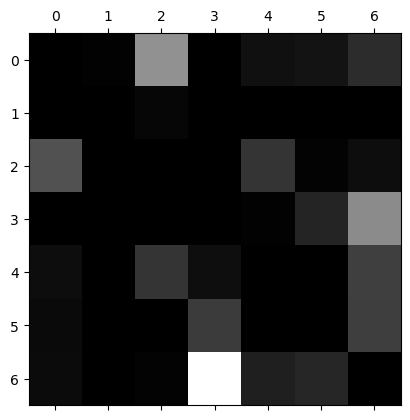

In [12]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [13]:
forest_clf.fit(features_arr, labels_arr)
cross_val_score(forest_clf, features_arr, labels_arr)

array([0.92745638, 0.91965106, 0.92378329, 0.92466697, 0.93109784])

In [14]:
test_set = strat_test_set.drop('Class', axis=1)
test_set_scaled = min_max.fit_transform(test_set)
prediction = forest_clf.predict(test_set_scaled)
prediction

array([3, 1, 6, ..., 4, 2, 3])

In [15]:
correct_labels = le.fit_transform(strat_test_set['Class'])
accuracy = np.mean(prediction == correct_labels) * 100
accuracy

90.74550128534705

In [16]:
GBM_clf = HistGradientBoostingClassifier().fit(features_arr, labels_arr)

In [17]:
cross_val_score(GBM_clf, features_arr, labels_arr)

array([0.94077135, 0.92056933, 0.92699725, 0.92237023, 0.93569132])

In [18]:
probas_GBM = cross_val_predict(GBM_clf, features_arr, labels_arr, cv=3)

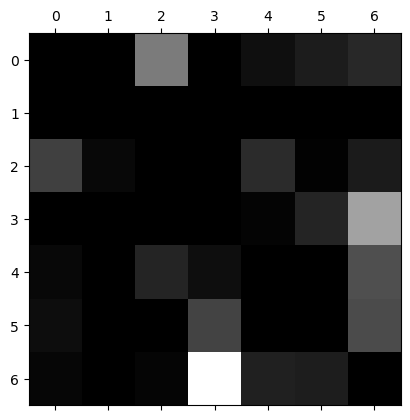

In [19]:
conf_mx_GBM = confusion_matrix(labels_arr, probas_GBM)
row_sums_GBM = conf_mx_GBM.sum(axis=1, keepdims=True)
norm_conf_mx_GBM = conf_mx_GBM / row_sums_GBM
np.fill_diagonal(norm_conf_mx_GBM, 0)
plt.matshow(norm_conf_mx_GBM, cmap=plt.cm.gray)
plt.show()

In [31]:
prediction_GBM = GBM_clf.predict(test_set_scaled)

In [30]:
print(classification_report(correct_labels, prediction))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       265
           1       1.00      1.00      1.00       104
           2       0.96      0.87      0.91       326
           3       0.86      0.96      0.91       709
           4       0.94      0.97      0.95       386
           5       0.95      0.94      0.95       406
           6       0.89      0.78      0.83       527

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [32]:
print(classification_report(correct_labels, prediction_GBM))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       265
           1       1.00      1.00      1.00       104
           2       0.95      0.86      0.90       326
           3       0.86      0.95      0.90       709
           4       0.92      0.97      0.94       386
           5       0.97      0.92      0.94       406
           6       0.87      0.81      0.84       527

    accuracy                           0.91      2723
   macro avg       0.93      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



## Sam changes

In [56]:
bean_data = pd.read_csv('Dry_Bean_Dataset.csv')

X=bean_data.drop(columns=['Class'])

min_max = MinMaxScaler(feature_range=(-1, 1))
X_scaled = min_max.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled

y = bean_data.Class
# Encode labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

from sklearn.svm import SVC

#Add these above later
# Libraries for metrics and evaluation
import numpy as np
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    log_loss, roc_auc_score, roc_curve, precision_recall_curve,
    cohen_kappa_score
)
from sklearn.preprocessing import label_binarize

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# Step 2: Create and train the XGBoost model
model = XGBClassifier(
    objective='multi:softmax',  # for multiclass classification
    num_class=len(np.unique(y))  # number of classes
)

model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
 
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.90      0.93      0.92       709
       HOROZ       0.96      0.96      0.96       386
       SEKER       0.96      0.96      0.96       406
        SIRA       0.88      0.87      0.87       527

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [61]:
model = XGBClassifier(
    objective='multi:softmax',  # for multiclass classification
    num_class=len(np.unique(y))  # number of classes
)

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    model, 
    param_distributions=param_dist, 
    n_iter=100,  # number of parameter settings sampled
    cv=5,  # number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # use all available cores
    verbose=2,
    random_state=42
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Step 3: Make predictions on the test set
y_pred = best_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Print best parameters
print("\nBest parameters found:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.91      0.92      0.91       709
       HOROZ       0.97      0.96      0.96       386
       SEKER       0.94      0.96      0.95       406
        SIRA       0.86      0.87      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723


Best parameters found:
{'colsample_bytree': 0.8587393446674896, 'gamma': 0.1941341919949361, 'learning_rate': 0.0788184237114849, 'max_depth': 6, 'n_estimators': 831, 'subsample': 0.7441380380821073}


In [26]:
model = RandomForestClassifier(
random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.90      0.92      0.91       709
       HOROZ       0.97      0.95      0.96       386
       SEKER       0.94      0.96      0.95       406
        SIRA       0.86      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [62]:
# Define the parameter distribution for random search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the base model
model = RandomForestClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Print best parameters
print("\nBest Parameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\13138\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
205 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
134 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\13138\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\13138\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-p

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.90      0.92      0.91       709
       HOROZ       0.96      0.96      0.96       386
       SEKER       0.94      0.96      0.95       406
        SIRA       0.86      0.85      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723


Best Parameters:
{'bootstrap': True, 'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 741}


In [ ]:
model = SVC(
kernel='rbf',
C=1.0,
gamma='scale',
probability=True,
random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.86      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.94      0.93       326
    DERMASON       0.92      0.91      0.92       709
       HOROZ       0.97      0.95      0.96       386
       SEKER       0.94      0.95      0.94       406
        SIRA       0.85      0.89      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [63]:
# Define the parameter distribution for random search
param_dist = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(20)),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Create the base model
model = SVC(probability=True, random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Print best parameters
print("\nBest Parameters:")
print(random_search.best_params_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.92      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.93      0.94       326
    DERMASON       0.91      0.93      0.92       709
       HOROZ       0.97      0.95      0.96       386
       SEKER       0.95      0.96      0.95       406
        SIRA       0.88      0.87      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723


Best Parameters:
{'C': 4.660699842170359, 'gamma': 0.9482609359088487, 'kernel': 'poly'}
